# Лабораторная работа 3. Обучение без учителя

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете также должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

## Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

## EM-алгоритм

### Краудсорсинг

Разметка данных — одна из самых трудозатратных задач в машинном обучении. Краудсорсинг позволяет распределить эту задачу на тысячи исполнителей, каждый из которых подготавливает небольшую часть датасета (подробнее <a href="https://academy.yandex.ru/posts/chto-takoe-kraudsorsing-i-pochemu-emu-nuzhno-uchitsya">тут</a>).

Пользователи могут допускать ошибки при разметке, кроме того, среди пользователей могут быть боты. Если мы попросим разметить каждый объект только одного пользователя, то с большой вероятностью получим не достаточно качественную разметку. Обычно каждый объект размечают несколько пользователей.

Результаты разметки нужно обработать. Самый простой метод *голос большинства*. Он заключается в том, что для каждого объекта нужно взять тот класс, который чаще всего ставили пользователи данному объекту. Это достаточно хороший метод, но он не учитывает различные особенности пользователей. Далее рассмотрим метод, который позволяет оценивать вероятность того, что разметчик ошибся.

### Метод Дэвида-Скина (Dawid, Skene, 1979)

Мы имеем в качестве данных $n_{ik}^u$ &mdash; количество раз, при которых разметчик $u \in U$ поставил класс $k \in K$ объекту $i \in I$ (возможно, разметчик видел этот объект несколько раз). Обозначим $Y_{ik} = I\{\text{объект $i$ класса $k$}\}$, это наши латентные величины. 

В качестве параметров имеем
* $\pi_{k\ell}^u$ &mdash; вероятность того, что разметчик $u$ поставил класс $\ell$ вместо правильного класса $k$. 
* $\rho_k$ &mdash; вероятность класса $k$.

Поймём, какой будет функция неполного правдоподобия в этой задаче. Прежде всего,

$$p_{\pi,p}(N, Y) = \prod_{i\in I}p(N_i, Y_i),$$

Если $k$ - номер класса $i$-го объекта, то

$$p(N_i, Y_i)=\underbrace{p(\text{объект $i$ класса $k$})}_{=\rho_k}p(N_i\mid\text{объект $i$ класса $k$})$$

(значения $Y_{it}$ однозначно определяются номером истинного класса, поэтому справа $Y_i$ пропадает). Далее, мы считаем, что разметчики действуют независимо, поэтому

$$p(N_i\mid\text{объект $i$ класса $k$}) = \prod_{u\in U}p(N_i^u\mid\text{объект $i$ класса $k$}).$$

Разберёмся с величиной $p(N_i^u\mid\text{объект $i$ класса $k$})$. Она отвечает за то, какие классы $u$-й разметчик ставил $i$-му объекту. Мы считаем, что встречи разметчика с объектом упорядочены по времени, тогда

$$p(\text{$u$-й разметчик отнёс $i$-й объект к классам $k'_1,\ldots,k'_r$}\mid\text{объект $i$ класса $k$}) =$$

$$=\prod_{s}p(\text{в $s$-ю встречу с $i$-м объектом $u$-й разметчик отнёс его к классу $k'_s$}\mid\text{объект $i$ класса $k$})$$

Эту вероятность можно переписать в виде

$$\prod_{\ell \in K} \left( \pi_{k\ell}^u \right)^{n_{i\ell}^u},$$

а итоговое неполное правдоподобие предстаёт в виде

$$p_{\pi,p}(N, Y) = \prod_{i\in I}\prod_{k \in K} \left( \rho_k \prod_{u\in U} \prod_{\ell \in K} \left( \pi_{k\ell}^u \right)^{n_{i\ell}^u} \right)^{Y_{ik}}$$

Его нам нужно максимизировать по $\pi$ и $\rho$

**Пояснение к формуле:** 

Вне больших скобок фиксируются объект и его класс, сама скобка возводится в степень 1, если рассматривается правильный класс объекта, и в степень 0 иначе. Внутри сначала записана вероятность того, что объект имеет данный класс, а затем &mdash; перебор по всем пользователям и всем классам, которые мог поставить данный пользователь. Наконец, записывается вероятность того, что пользователь нашему объекту поставил некоторый класс, которая возводится в степень того, сколько раз он поставил этот класс. Например, если пользователь видел изображение котика 5 раз, при этом 3 раза он сказал, что котик, а два раза &mdash; песик, то вероятность $\pi_{cat,cat}^u$ для данного котика учтется 3 раза, а вероятность $\pi_{cat,dog}^u$ &mdash; 2 раза.

**Задание 1 (2 балл)**

Распишите итерационную процедуру EM-алгоритма и значение ELBO в методе Дэвида-Скина.

помним что у ELBO в общем случае вид $\int q(Y)\log \frac{p_{\theta}(N, Y)}{q(Y)}dY$ \
в нашем случае $\theta = (\pi, \rho)$\ 
тут у нас $Y \in \{0,1\}^{|I|*|K|}$ \
а сам интеграл превращается в сумму по всем $Y$ \
\
**E-шаг**
$$q(Y) = Pr(Y|N) \propto p_{\pi, \rho}(N, Y)$$
дальше как в примере из лекции говорим что плотность можно представить как
$$q(Y) = \prod_{i} q_{i}(Y_{i})$$ 

$$q_{i}(Y_{i}) \propto \prod_{k \in K} \left( \rho_k \prod_{u\in U} \prod_{\ell \in K} \left( \pi_{k\ell}^u \right)^{n_{i\ell}^u} \right)^{Y_{ik}}$$
теперь пусть объект $i$ пренадлжеит конкретному классу $k$, тогда
$$q_i(k) \propto \rho_k \prod_{u\in U} \prod_{\ell \in K} \left( \pi_{k\ell}^u \right)^{n_{i\ell}^u}$$
$$q_i(k) = \frac{\rho_k \prod_{u\in U} \prod_{\ell \in K} \left( \pi_{k\ell}^u \right)^{n_{i\ell}^u}}{\sum_{r\in K} \rho_r \prod_{u\in U} \prod_{\ell \in K} \left(\pi_{r\ell}^u \right)^{n_{i\ell}^u}} = \gamma_{i,k}$$ 

**M-шаг** \
нам нужно максимизировать по $\pi, \rho$ выражение $E \log p(N, Y)$
$$E_q \log p(N, Y) = \sum_{i\in I}\sum_{k \in K} E(Y_{i,k}) * (\log \rho_k + \sum_{u\in U} \sum_{\ell \in K} n_{i\ell}^u \log \pi_{k\ell}^u) $$
***по $\rho$*** \
у наc функционал:
$$ \sum_{i\in I}\sum_{k \in K} \gamma_{i,k} * \log \rho_k$$
$$ \sum_{k \in K} \rho_k =1$$
дальше ровно этот пример был на лекции, получаем
$$\rho_k = \sum_{i\in I} \frac{\gamma_{i,k}}{|I|}$$


***по $\pi$*** \
мы максимизируем по $\pi$
$$\sum_{i\in I}\sum_{k \in K} E(Y_{i,k}) \sum_{u\in U} \sum_{\ell \in K} n_{i\ell}^u \log \pi_{k\ell}^u$$
при
$$\forall k, u \sum_{\ell \in K} \pi_{k\ell}^u = 1$$ 
это на самом деле та же задача еще несколько раз
получаем 
$$\pi_{k\ell}^u = \frac{\sum_i \gamma_{i,k} n_{i,\ell}^u}{\sum_i \sum_{\ell} \gamma_{i,k} * n_{i, \ell}^u} $$




**Задание 2 (3 балла)** 

Реализуйте следующие методы агрегации результатов разметки в краудсорсинге:

* голосование по большинству;
* метод Дэвида-Скина.

Оба метода должны возвращать вероятность принадлежности объекта каждому из классов (итоговая метка получается выбором класса с наибольшей оценкой вероятности). 

Заметим, что метод голосования по большинству можно реализовать с помощью одной агрегирующей функцией `pandas.crosstab`, а метод Дэвида-Скина основывается на EM-алгоритме (при реализации стоит учесть, что EM-алгоритм сходится в локальные оптимумы, то есть его стоит запускать из разных начальных приближений).

Примените эти два метода к датасетам *Toloka Aggregation Relevance 2* и *Toloka Aggregation Relevance 5*, которые можно скачать <a href="https://toloka.ai/ru/datasets">тут</a>, и сравните их между собой. 

Обратите внимание, что в последнем датасете 5 различных меток, причем некоторые объекты в датасете имеют не один, а несколько правильных ответов. Любой из таких ответов считается правильным.

In [187]:
import numpy
import pandas as pd
import typing as tp
import numpy as np
from numba import njit, types
from numba.experimental import jitclass
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.base import TransformerMixin
from tqdm import tqdm

In [144]:
class EMAlgo:

    answers: np.ndarray
    gamma: np.ndarray
    pi: np.ndarray
    rho: np.ndarray
    answers_df: pd.DataFrame

    def __init__(self, df: pd.DataFrame, df_answers: pd.DataFrame, pi: tp.Optional[np.ndarray]=None,
                 rho: tp.Optional[np.ndarray]=None, gamma: tp.Optional[np.ndarray]=None):
        df = df.copy()
        df_answers = df_answers.copy()

        len_obj = len(df['obj'].unique())
        len_users = len(df['user'].unique())
        num_classes = len(df['label'].unique())

        if pi is None:
            pi = np.zeros([len_users, num_classes, num_classes])
            for class_ in range(num_classes):
                pi_raw = np.random.rand(num_classes)
                pi_raw = pi_raw / np.sum(pi_raw)
                pi[:, :, class_] = pi_raw

        if rho is None:
            rho = np.random.rand(num_classes)
            rho = rho / np.sum(rho)

        object_encoder = preprocessing.LabelEncoder()
        object_encoder.fit(df['obj'])
        df["obj"] = object_encoder.transform(df["obj"])

        df_answers['obj'] = object_encoder.transform(df_answers['obj'])

        df["user"] = df["user"].astype('category')
        df["user"] = df["user"].cat.codes




        answers = np.zeros([len_obj, len_users, num_classes])
        for i, row in df.iterrows():
            answers[row['obj'], row['user'], row['label']] += 1

        if gamma is None:
            gamma = []
            for _ in range(len_obj):
                new_gammas = np.random.rand(num_classes)
                new_gammas = new_gammas / sum(new_gammas)
                gamma.append(new_gammas)
            gamma = np.array(gamma)

        self.gamma = gamma
        self.pi = pi
        self.rho = rho
        self.answers_df = df_answers
        self.answers = answers

    def E_step(self):
        global predictions_probs
        predictions_probs = self.pi[None, ...] ** self.answers[..., None]
        predictions_probs = predictions_probs.prod(axis=(1, 2)) * self.rho[None, :]
        predictions_probs = predictions_probs / (predictions_probs.sum(axis=-1, keepdims=True) + 1e-9)
        self.gamma = predictions_probs

    def M_step(self):
        new_rho = self.gamma.sum(axis=0) / len(self.gamma)

        new_pi = self.answers[:, :, None, :] * self.gamma[:, None, :, None]
        new_pi = new_pi.sum(axis=0)
        new_pi = new_pi / (new_pi.sum(axis=-1, keepdims=True) + 1e-8)

        self.rho = new_rho
        self.pi = new_pi

    def get_ELBO(self):
        likelihood = (np.log(self.pi[None, ...] + 1e-8) * self.answers[..., None]).sum(axis=(1, 2))
        likelihood += np.log(self.rho + 1e-8)[None, :]
        likelihood = (self.gamma * likelihood).sum()

        entropy = (self.gamma * np.log(self.gamma + 1e-8)).sum()

        return likelihood - entropy

    def get_accuracy(self, predicts):
        guesses = []
        for i, predict in enumerate(predicts):
            row = self.answers_df[self.answers_df['obj'] == i]
            if len(row):
                guesses.append(predict == row['label'])

        return np.mean(guesses)



    def fit(self, steps):
        predicts = self.gamma.argmax(axis=1)
        print(f'initial accuracy: {self.get_accuracy(predicts)}')
        for _ in range(steps):
            print('E step')
            self.E_step()
            print('M step')
            self.M_step()
            predicts = self.gamma.argmax(axis=1)
            print(f'accuracy: {self.get_accuracy(predicts)}')


In [145]:
tar2 = pd.read_csv('~/Downloads/TlkAgg2/crowd_labels.tsv', sep='\t', names=['user', 'obj', 'label'])
tar2_answers = pd.read_csv('~/Downloads/TlkAgg2/golden_labels.tsv', sep='\t', names=['obj', 'label'])

EM = EMAlgo(tar2, tar2_answers)

In [172]:
EM.fit(2)

initial accuracy: 0.5020339319376922
E step
M step
accuracy: 0.6486099811489235
E step
M step
accuracy: 0.79212322651056653


In [122]:
mv2 = pd.crosstab(tar2['obj'], tar2['label'])
mv2['maj_label'] = mv2.idxmax(axis=1)
mv2_labels = mv2.maj_label.tolist()

EM.get_accuracy(mv2_labels)

0.7763667030459371

In [167]:
tar5 = pd.read_csv('~/Downloads/TlkAgg5/crowd_labels.tsv', sep='\t', names=['user', 'obj', 'label'])
tar5['label'] = tar5['label'] - 1
tar5_answers = pd.read_csv('~/Downloads/TlkAgg5/golden_labels.tsv', sep='\t', names=['obj', 'label'])
tar5_answers['label'] = tar5_answers['label'] - 1

In [168]:
EM5 = EMAlgo(tar5, tar5_answers)

In [173]:
EM5.fit(5)

initial accuracy: 0.4223520084
E step
M step
accuracy: 0.45473684210
E step
M step
accuracy: 0.518823529411
E step
M step
accuracy: 0.63292317679558
E step
M step
accuracy: 0.675583978835107



In [175]:
mv5 = pd.crosstab(tar5['obj'], tar5['label'])
mv5['maj_label'] = mv5.idxmax(axis=1)
mv5_labels = mv5.maj_label.tolist()

EM5.get_accuracy(mv5_labels)

0.8991738971


**Задание 3 (1 балл)**

Попробуйте в методе Дэвида-Скина в качестве начального приближения вероятностей классов для каждого объекта подавать те вероятности, которые посчитаны методом голосования по большинству, и провести сначала M-шаг.

Далее мы будем работать с таблицей `vacancies.csv` и нам нужно подготовить данные для работы, а именно сделайте следующее:
    
- Разбейте данные на обучающую выборку (строки, не содержащие метки кластеров) и тестовую (строки, содержащие метки кластеров)
- Предобработайте текст, содержащийся в колонках *name* и *description* (уберите артефакты, нормализуйте и т.д.)

In [177]:
df_vac = pd.read_csv('~/Downloads/vacancies.csv')

In [178]:
from bs4 import BeautifulSoup
df_vac = df_vac[['name', 'description', 'category']]

def parse(txt):
    return BeautifulSoup(txt).text
df_vac['name'] = df_vac['name'].apply(lambda x: parse(x))
df_vac['description'] = df_vac['description'].apply(lambda x: parse(x))

/Users/captainbanana/env/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [179]:
cv = CountVectorizer(max_df=0.95,
                     min_df=0.03,
                     strip_accents='unicode',
                     analyzer='word',
                     lowercase=True)
X = cv.fit_transform((df_vac['name'] + ' ' + df_vac['description']))

In [180]:
df_test = df_vac[df_vac['category'].isna()]
df_train = df_vac[df_vac['category'].notna()]

In [184]:
X_train = X[df_train.index.to_numpy()]
X_train = pd.DataFrame(X_train.toarray(), columns=cv.vocabulary_, index=df_train.index).T
X_test = X[df_test.index.to_numpy()]
X_test = pd.DataFrame(X_test.toarray(), columns=cv.vocabulary_, index=df_test.index).T

### Тематическое моделирование

Тематическое моделирование заключается в поиске тем $T$, которые хорошо бы описывали документы $D$ со словарём $W$. Большинство тематических моделей оперирует данными в формате "мешка слов", т.е. учитывают только частоты слов в документах, а не их порядок. Одной из простейших тематических моделей является [PLSA](https://en.wikipedia.org/wiki/Probabilistic_latent_semantic_analysis), которая приводит к задаче стохастического матричного разложения: 

$$F \approx \Phi \times \Theta$$
где
- $F_{W \times D}$— матрица распределений слов в документах (нормированные частоты)
- $\Phi_{W \times T}$ — матрица распределений слов в темах (модель)
- $\Theta_{T \times D}$ — матрица распределений тем в документах (результат применения модели к обучающим данным)

Можно сказать, что алгоритмы тематического моделирования производят мягкую бикластеризацию данных:
 - *мягкую*, так как объекты относятся не строго к одному кластеру, а к нескольким с разными вероятностями
 - *бикластеризацию*, так как модель одновременно кластеризует слова по темам и темы по документам.
 
 С вероятностной точки зрения, задача обучения модели PLSA ставится как максимизация неполного правдоподобия по параметам $\Phi$ и $\Theta$. ЕМ-алгоритм для модели PLSA заключается в повторении двух шагов:

- **Е-шаг** — оценка распределений тем для каждого слова в каждом документе по параметрам $\Phi$ и $\Theta$ (шаг 6);
- **М-шаг** — обновление параметров $\Phi$ и $\Theta$ на основе полученных оценок (шаги 7 и 9).

Существуют различные модификации итерационного процесса, позволяющие снизить расходы по памяти. В данном случае, мы избежим хранения трехмерной матрицы $p_{tdw}$, сразу пересчитывая $\Theta$ для текущего документа и аккумулируя счетчики $n_{wt}$ для последующего пересчета $\Phi$.

Псевдокод алгоритма записывается следующим образом:

1. Инициализировать $\phi_{wt}^0$ для всех $w \in W$, $t \in T$ и $\theta_{td}^0$ для всех $t \in T$, $d \in D$
2. Внешний цикл по итерациям $i = 1 ... max\_iter$:
3. $\quad$ $n_{wt}^i := 0$, $n_t^i := 0$ для всех $w \in W$ и $t \in T$ 
4. $\quad$ Внутренний цикл по документам $d \in D$  
5. $\qquad$ $Z_w := \sum_{t \in T} \phi_{wt}^{i-1}\theta_{td}^{i-1}$ для всех $w \in d$ $\cfrac{}{}$
6. $\qquad$ $p_{tdw} := \cfrac{ \phi_{wt}^{i-1}\theta_{td}^{i-1} }{ Z_w }$ (**E-шаг**)
7. $\qquad$ $\theta_{td}^{i} := \cfrac{ \sum_{w \in d} n_{dw} p_{tdw} }{ n_d }$ для всех $t \in T$ (**M-шаг**)
8. $\qquad$ Увеличить $n_{wt}^i$ и $n_t^i$ на $n_{dw} p_{tdw}$ для всех $w \in W$ и $t \in T$
9. $\quad \phi_{wt}^i := \cfrac{n_{wt}^i}{n_t^i}$ для всех $w \in W$ и $t \in T$ (**M-шаг**)

Обозначения:
 - $p_{tdw}$ — вероятность темы $t$ для слова $w$ в документе $d$
 - $\phi_{wt}$ — элемент матрицы $\Phi$, соответствующий вероятности слова $w$ в теме $t$
 - $\theta_{td}$ — элемент матрицы $\Theta$, соответствующий вероятности темы $t$ в документе $d$
 - $n_{wt}$ — элемент матрицы счётчиков отнесения слова $w$ к теме $t$ (путем нормирования этой матрицы получается матрица $\Phi$)
 - $Z_w$ — элемент вектора вспомогательных переменных, соответствующий слову $w$
 - $n_t$ — вектор нормировочных констант для матрицы $n_{wt}$
 - $n_d$ — вектор нормировочных констант для матрицы $n_{dw}$
 - $n$ — суммарное число слов в коллекции

Для оценивания качества построенной модели и контроля сходимости процесса обучения обычно используют [перплексию](http://www.machinelearning.ru/wiki/images/8/88/Voron-iip9-talk.pdf):

$$\mathcal{P} = \exp\bigg(- \frac{\mathcal{L}}{n} \bigg) = \exp\bigg(- \cfrac{1}{n}\sum_{d \in D}\sum_{w \in d} n_{dw} \ln \big(\sum_{t \in T}\phi_{wt}\theta_{td} \big)\bigg)$$

Это традиционная мера качества в тематическом моделировании, которая основана на правдоподобии модели $\mathcal{L}$. Число итераций $max\_iter$ в алгоритме обучения следует выбирать достаточным для того, чтобы перплексия перестала существенно убывать. Однако известно, что перплексия плохо отражает интерпретируемость найденных тем, поэтому помимо нее обычно используются дополнительные меры или экспертные оценки.

**Рекомендации к реализации:**

- При делении на нулевые значения нужно просто заменить частное на ноль.
- ЕМ-алгоритм стоит реализовывать с использованием векторных операций. Для проверки корректности реализации сперва можно написать скалярную версию, после чего векторизовать её, удостоверившись, что обе реализации дают одинаковый результат. Невекторизованный алгоритм может работать в сотни раз медленнее векторизованного, и его использование может привести к невозможности выполнения задания.
- Итерационный процесс следует начинать, инициализировав матрицы $\Phi$ и $\Theta$. Инициализация может быть случайной, важно не забыть отнормировать столбцы матриц.
- Неэффективная реализация перплексии может в разы замедлить работу алгоритма.

**Задание 4 (3 балла)**

Реализуйте описанный выше ЕМ-алгоритм для модели *PLSA* и добавьте в вашу реализацию подсчёт перплексии. 

Примените ваш алгоритм к подготовленным ранее данным (объедините текст из колонок *name* и *description*), рассмотрев число тем T = 5, а также:

* Постройте график значения перплексии в зависимости от итерации (убедитесь в корректности реализации: график перплексии должен быть невозрастающим). 
* Выведите для каждой темы топ-20 наиболее вероятных слов.

Посмотрите внимательно на полученные темы. Как вам кажется, получились ли они интерпретируемыми?

In [188]:
class PLSA():
    def __init__(self, num_topics=5, num_iter=10):
        self.num_topics = num_topics
        self.topic_names = [f'topic_{index}' for index in range(num_topics)]
        self.num_iter = num_iter

    def initialization(self, vocabulary, doc_names):
        self.phi = pd.DataFrame(np.random.dirichlet(np.ones(self.num_topics), size=len(vocabulary)), index=vocabulary, columns=self.topic_names)
        self.theta = pd.DataFrame(np.random.dirichlet(np.ones(len(doc_names)), size=self.num_topics), index=self.topic_names, columns=doc_names)

    def Iter(self, X):
        elbo = 0
        divider = self.phi @ self.theta  # ~= F WxD matrix.
        for t in range(self.num_topics):
            phi = self.phi.values[:, t][:, None]
            theta = self.theta.values[t][None]
            self.gamma = phi@theta / divider
            X_g = X * self.gamma

            elbo += np.sum(np.sum(self.gamma * (np.log(phi) + np.log(theta)) * X.values)) - \
                    np.sum(np.sum(self.gamma * np.log(self.gamma) * X.values))
            self.theta.values[t] = X_g.sum(axis=0)
            self.phi.values[:, t] = X_g.sum(axis=1)
        self.phi /= self.phi.sum(axis=0)
        self.theta /= self.theta.sum(axis=0)
        self.scores['elbo'].append(elbo)


    def get_ELBO(self, X):
        return (
            self.gamma * (np.log(self.phi.values.T[:, :, np.newaxis])
                          + np.log(self.theta.values[:, np.newaxis, :]))
            * X.values[np.newaxis, :, :]
        ).sum() - (
            self.gamma * np.log(self.gamma) * X.values[np.newaxis, :, :]
        ).sum()

    def get_perplexity(self, X):
        return np.exp(-(X * np.log(self.phi @ self.theta)).values.sum()/X.values.sum())

    def fit(self, X):
        self.initialization(X.index, X.columns)

        self.scores = {'perplexity': [self.get_perplexity(X)], 'elbo': []}
        for _ in tqdm(range(self.num_iter), desc='Итерации EM'):
            self.Iter(X)
            self.scores['perplexity'].append(self.get_perplexity(X))

        return self

In [189]:
model = PLSA()
model.fit(X_train)

Итерации EM: 100%|██████████| 10/10 [01:00<00:00,  6.03s/it]


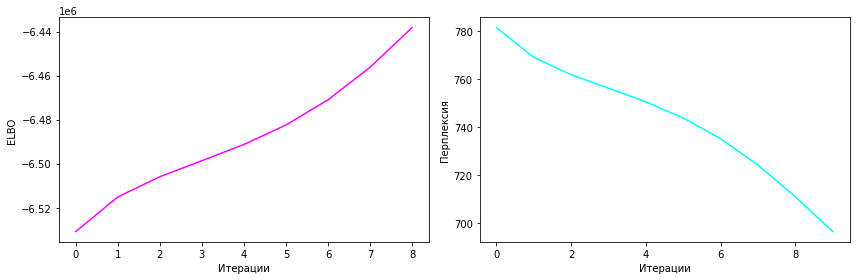

In [190]:
def show_metrics(model):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(model.scores['elbo'][1:], color='magenta')
    plt.ylabel('ELBO')
    plt.xlabel('Итерации')
    plt.subplot(122)
    plt.plot(model.scores['perplexity'][1:], color='aqua')
    plt.ylabel('Перплексия')
    plt.xlabel('Итерации')
    plt.tight_layout()
    plt.show()
show_metrics(model)

In [193]:
def show_words_in_topics(model):
    N = 20
    topic_tokens = {}
    for topic, phi in model.phi.iteritems():
        topic_tokens[topic] =phi.sort_values(ascending=False).index[:N].tolist()

    for topic, tokens in topic_tokens.items():
        tokens = ' '.join(tokens)
        print(f'{topic}: {tokens}')
show_words_in_topics(model)

topic_0: характер главное информацию бухгалтерского перспективы отдыха вами грузов внутреннеи нам продаже будете знании первыи заключения будешь объекты будут раионе плана
topic_1: главное вами информацию перспективы бухгалтерского бизнес отдыха раионе сдачи характер знании целеустремленность первыи microsoft заключения будете объекты деятельность плана конкурсы
topic_2: знании отдыха характер объекты построить будете главное раионе трудового руководство процесса организованность обязанности нашу раз строительно внутреннеи дисциплины будешь материалов
topic_3: главное характер знании бухгалтерского кандидатов объекты отдыха процесса обязанности внутреннеи построить приглашаем будете трудового строительно информацию новые нам выполнением деятельность
topic_4: построить знании характер главное будете раионе материалов кандидатов нам обязанности грузов объекты новые заключения проведении вами сдачи плана трудового первыи


блин, вроде чушь какая-то - ничего не интерпретируется

**Задание 5 (1 балл)** 

Рассмотрите большее число тем (10, 20) и несколько различных начальных приближений. Проанализируйте результаты и ответьте на следующие вопросы: 

- Mожно ли сказать, что интерпретируемость каждой темы изменяется с ростом их числа?
- Устойчив ли алгоритм к начальному приближению на примере идентичности топовых слов в соответствующих темах?
- Отражает ли перплексия качество получаемых моделей? В чём заключается причина хорошего/плохого соответствия?

## Кластеризация

**Задание 6 (2 балла)** 

В данном задание следуют сравнить между собой алгоритмы [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) и [Birch](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html) используя подготовленные ранее данные.

Поэксперементируйте с различными способами векторизации текста, например можно:

- использовать только *name* / *description*, объединить их в один текст или сконкатенировать векторные представления,
- использовать представление в виде мешка слов или какую-либо его модификацию,
- сократить размерность векторного представления, используя PCA или векторные представления слов,

или сделать что-то более интересное, что вы придумаете!

Выберете лучшую комбинацию векторизации и алгоритма кластеризации и визуализируйте полученные кластеры (например, воспользовавшись облаком тегов, или предложите свой способ). Обоснуйте почему вы считаете, что выбранный вами подход для решения задачи кластеризации вакансий является лучшим.

**Задание "со звездочкой" (1 балл)** 

Попробуйте обогатить векторное представление полученное из текстов другими признаками из таблицы `vacancies.csv` и добиться лучшей интерпретируемости кластеров.

## Частичное обучение

Часто у нас есть размеченная выборка только для небольшой части выборки. Тогда мы можем применить подходы _частичного обучения (semi-supervised learning)_. Более подробно про реализацию таких методов в sklearn можно прочитать в разделе [semi-supervised](http://scikit-learn.org/stable/modules/label_propagation.html#semi-supervised).

**Задание 7 (2 балла)** 

В этом задание нужно сделать следующее: 

- Разделите объекты, у которых существуют метки, на обучающую и тестовую выборки (при этом не обязательно делить в соотношении 70% на 30%). Обогатите обучающую выборку объектами без меток.
- Воспользовавшись опытом выполнения задания 6, возьмите "лучшее" векторное представление вакансий и обучите [LabelSpreading](http://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html) (подберите лучшие параметры, опираясь на [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)).
- Попробуйте запустить алгоритм несколько раз, отмечая известными различные объекты, а также меняя пропорции разбиения, посчитайте качество и визуализируйте результаты. Можно ли сказать что алгоритм сильно зависит от известных начальных объектов? Есть ли класс, для которого это больше всего заметно?